# Shapes

- Input - Batch+size
- Output - size


In [1]:
from torch import nn
import torch
import numpy as np

# Neural Network Classification with PyTorch

# 1. Make Circle

## Data

In [23]:
import sklearn
from sklearn.datasets import make_circles

In [24]:
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [25]:
len(X)

1000

In [26]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

### Visualization

In [27]:
import seaborn as sns

<Axes: >

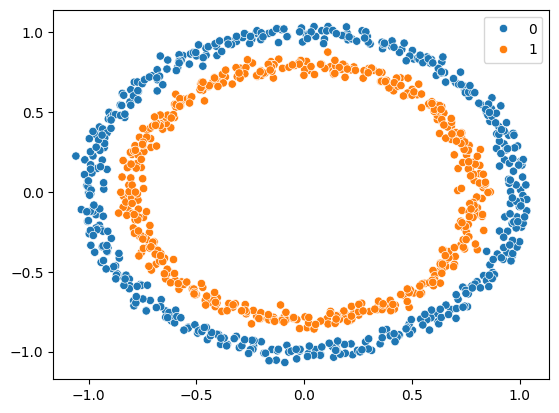

In [30]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

## Model Definition

In [31]:
# Check input and output shape
X.shape, y.shape

((1000, 2), (1000,))

In [33]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [38]:
# Build Model Definition
class CircleModelV0(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=5)
        self.layer_2 = nn.Linear(in_features=5,
                                 out_features=1)
        
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2( self.layer_1(x))

model_0 = CircleModelV0()
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [41]:
# Making the same model using nn.Sequential()
torch.manual_seed(42)
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [42]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('0.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('1.bias', tensor([-0.2060]))])

In [48]:
# Make untrained predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test)
# untrained_preds

torch.Size([200, 1])

<Axes: xlabel='None', ylabel='None'>

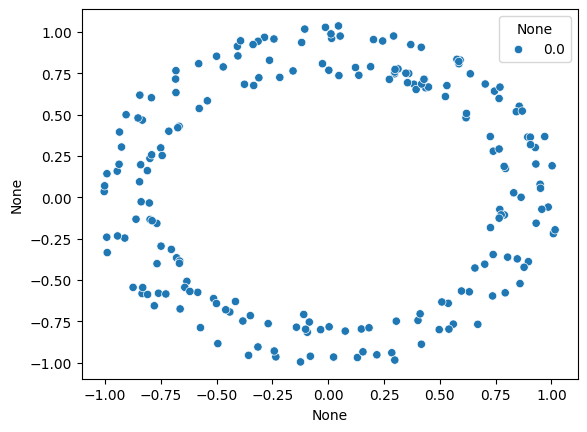

In [68]:
untrained_preds = torch.round(untrained_preds) # these are logits output

y_pred_prob = torch.sigmoid(untrained_preds)
y_pred = torch.round(y_pred_prob)


sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_pred.squeeze())


## Model Training and Inference

In [70]:
# Loss Function

loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.1)

# Accuracy
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [71]:
# Training Loop
torch.manual_seed(42)

epochs = 100
preds = []

for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss  = loss_fn(y_logits,y_train) # cause BCEWithloss expects logits as input
    # loss = loss_fn(torch.sigmoid(y_logits),y_train) # With BCELoss
    acc = accuracy_fn(y_train,y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()

        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(test_pred,y_test)

        preds.append([y_pred,test_pred,epoch])

    if epoch%10==0 :
        print(f"Epoch:{epoch} | Loss:{loss:.4f} | Accuracy:{acc:.2f}% | Testloss:{test_loss:.4f} | Test Acc:{test_acc:.2f}%")        



Epoch:0 | Loss:0.6957 | Accuracy:50.00% | Testloss:0.7015% | Test Acc:50.00
Epoch:10 | Loss:0.6938 | Accuracy:50.12% | Testloss:0.6949% | Test Acc:50.00
Epoch:20 | Loss:0.6931 | Accuracy:50.88% | Testloss:0.6939% | Test Acc:50.50
Epoch:30 | Loss:0.6930 | Accuracy:49.62% | Testloss:0.6945% | Test Acc:45.00
Epoch:40 | Loss:0.6930 | Accuracy:51.25% | Testloss:0.6949% | Test Acc:46.50
Epoch:50 | Loss:0.6930 | Accuracy:51.62% | Testloss:0.6945% | Test Acc:47.50
Epoch:60 | Loss:0.6930 | Accuracy:50.88% | Testloss:0.6949% | Test Acc:45.00
Epoch:70 | Loss:0.6930 | Accuracy:51.12% | Testloss:0.6946% | Test Acc:45.00
Epoch:80 | Loss:0.6930 | Accuracy:50.88% | Testloss:0.6946% | Test Acc:45.50
Epoch:90 | Loss:0.6930 | Accuracy:51.12% | Testloss:0.6947% | Test Acc:45.50


### Downloading a file from a URL using requests

In [73]:
# Visualization
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("Exist")
else:
    print("Downloading...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

Downloading...


In [75]:
# from helper_functions import plot_predictions, plot_decision_boundary
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

In [77]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    # model.to("cpu")
    # X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

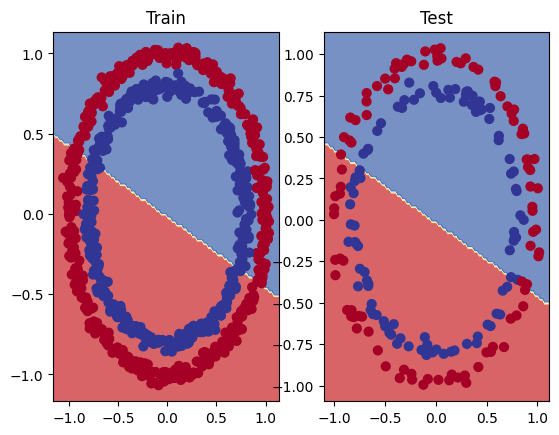

In [79]:
# Plot decision boundary of the model
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## Improving the Model

In [83]:
# Adding the hidden layer
# Adding the hidden units
torch.manual_seed(42)
model_1 = nn.Sequential(
    nn.Linear(2,10),
    nn.Linear(10,10),
    nn.Linear(10,1)
)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [84]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

# Training Loop
torch.manual_seed(42)

epochs = 500
preds = []

for epoch in range(epochs):
    model_0.train()

    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss  = loss_fn(y_logits,y_train) # cause BCEWithloss expects logits as input
    # loss = loss_fn(torch.sigmoid(y_logits),y_train) # With BCELoss
    acc = accuracy_fn(y_train,y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()

        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(test_pred,y_test)

        preds.append([y_pred,test_pred,epoch])

    if epoch%10==0 :
        print(f"Epoch:{epoch} | Loss:{loss:.4f} | Accuracy:{acc:.2f}% | Testloss:{test_loss:.4f} | Test Acc:{test_acc:.2f}%")        



Epoch:0 | Loss:0.6940 | Accuracy:50.88% | Testloss:0.6926 | Test Acc:51.00%
Epoch:10 | Loss:0.6937 | Accuracy:50.25% | Testloss:0.6927 | Test Acc:50.00%
Epoch:20 | Loss:0.6935 | Accuracy:50.12% | Testloss:0.6928 | Test Acc:49.50%
Epoch:30 | Loss:0.6934 | Accuracy:50.50% | Testloss:0.6930 | Test Acc:48.00%
Epoch:40 | Loss:0.6933 | Accuracy:50.38% | Testloss:0.6931 | Test Acc:49.00%
Epoch:50 | Loss:0.6932 | Accuracy:49.88% | Testloss:0.6932 | Test Acc:50.00%
Epoch:60 | Loss:0.6932 | Accuracy:49.38% | Testloss:0.6934 | Test Acc:51.50%
Epoch:70 | Loss:0.6931 | Accuracy:49.38% | Testloss:0.6935 | Test Acc:50.50%
Epoch:80 | Loss:0.6931 | Accuracy:50.12% | Testloss:0.6936 | Test Acc:50.00%
Epoch:90 | Loss:0.6931 | Accuracy:50.50% | Testloss:0.6937 | Test Acc:48.50%
Epoch:100 | Loss:0.6930 | Accuracy:50.38% | Testloss:0.6938 | Test Acc:48.00%
Epoch:110 | Loss:0.6930 | Accuracy:50.88% | Testloss:0.6939 | Test Acc:46.50%
Epoch:120 | Loss:0.6930 | Accuracy:50.75% | Testloss:0.6940 | Test Acc:46.5

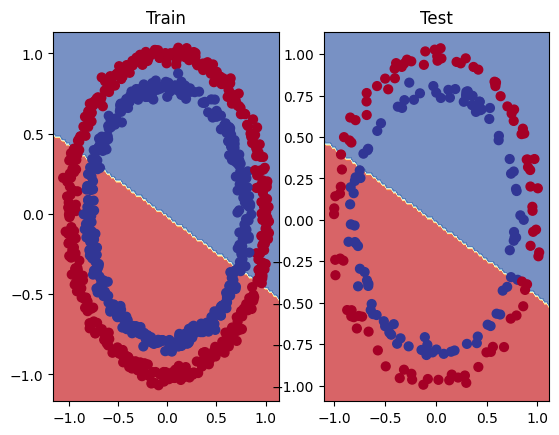

In [85]:
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

# Model with Non Linear Layers

In [89]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(2,10)
        self.layer_2 = nn.Linear(10,10)
        self.layer_3 = nn.Linear(10,1)
        self.relu = nn.ReLU()

    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    

model_2 = CircleModelV2()
model_2


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [92]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

# Training Loop
torch.manual_seed(42)

epochs = 1000
preds = []

for epoch in range(epochs):
    model_2.train()

    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss  = loss_fn(y_logits,y_train) # cause BCEWithloss expects logits as input
    # loss = loss_fn(torch.sigmoid(y_logits),y_train) # With BCELoss
    acc = accuracy_fn(y_train,y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_2(X_test).squeeze()

        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(test_pred,y_test)

        preds.append([y_pred,test_pred,epoch])

    if epoch%100==0 :
        print(f"Epoch:{epoch} | Loss:{loss:.4f} | Accuracy:{acc:.2f}% | Testloss:{test_loss:.4f} | Test Acc:{test_acc:.2f}%")        



Epoch:0 | Loss:0.6864 | Accuracy:52.62% | Testloss:0.6852 | Test Acc:55.50%
Epoch:100 | Loss:0.6836 | Accuracy:53.37% | Testloss:0.6828 | Test Acc:56.00%
Epoch:200 | Loss:0.6795 | Accuracy:61.88% | Testloss:0.6797 | Test Acc:61.00%
Epoch:300 | Loss:0.6733 | Accuracy:63.88% | Testloss:0.6755 | Test Acc:58.50%
Epoch:400 | Loss:0.6639 | Accuracy:66.88% | Testloss:0.6693 | Test Acc:61.00%
Epoch:500 | Loss:0.6494 | Accuracy:66.62% | Testloss:0.6592 | Test Acc:60.00%
Epoch:600 | Loss:0.6246 | Accuracy:68.88% | Testloss:0.6395 | Test Acc:62.00%
Epoch:700 | Loss:0.5784 | Accuracy:84.25% | Testloss:0.5982 | Test Acc:75.00%
Epoch:800 | Loss:0.4964 | Accuracy:95.50% | Testloss:0.5210 | Test Acc:91.00%
Epoch:900 | Loss:0.3770 | Accuracy:97.88% | Testloss:0.4081 | Test Acc:94.00%


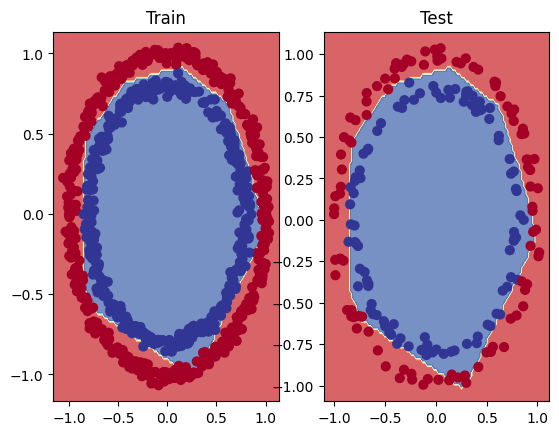

In [93]:
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,X_test,y_test)